In [1]:
from steam_web_api import Steam
import pandas as pd
import numpy as np
from formatting_data import get_data_frame
from functions import draw_userx_gametimes

In [2]:
KEY = ""
steam = Steam(KEY)
username = ""

steam_profile = steam.users.search_user(username)
steam_id = steam_profile['player']['steamid']
user_owned_games = steam.users.get_owned_games(steam_id)

In [3]:
game_names = []
playtimes = []

for game in user_owned_games['games']:
    game_names.append(game['name'])
    playtimes.append(game['playtime_forever'])

In [4]:
user_game_times = pd.DataFrame({'game_name': game_names, 'playtime': playtimes})

In [5]:
df, game_df = get_data_frame(6000000)

In [6]:
user_df = game_df.loc[game_df.game_name.isin(game_names)].merge(user_game_times, on=['game_name'])

In [7]:
def predict(I, x, iterations=500, lambda_=0.01, alpha=0.00000001):
    utilmat = np.zeros(I.shape[0])
    utilmat[x.game_id] = x.playtime

    R = (utilmat != 0).astype(int)

    num_features = 100
    np.random.seed(9)
    theta = np.random.uniform(0,1, num_features)
    
    for i in range(iterations):
        pred = theta @ I.T
        error = (utilmat - pred * R)

        dj_dtheta = error @ I
        dj_dtheta += lambda_ * dj_dtheta
        dj_dtheta *= alpha

        theta += dj_dtheta

    return theta

In [8]:
I = np.loadtxt('model_matrices/item.txt')

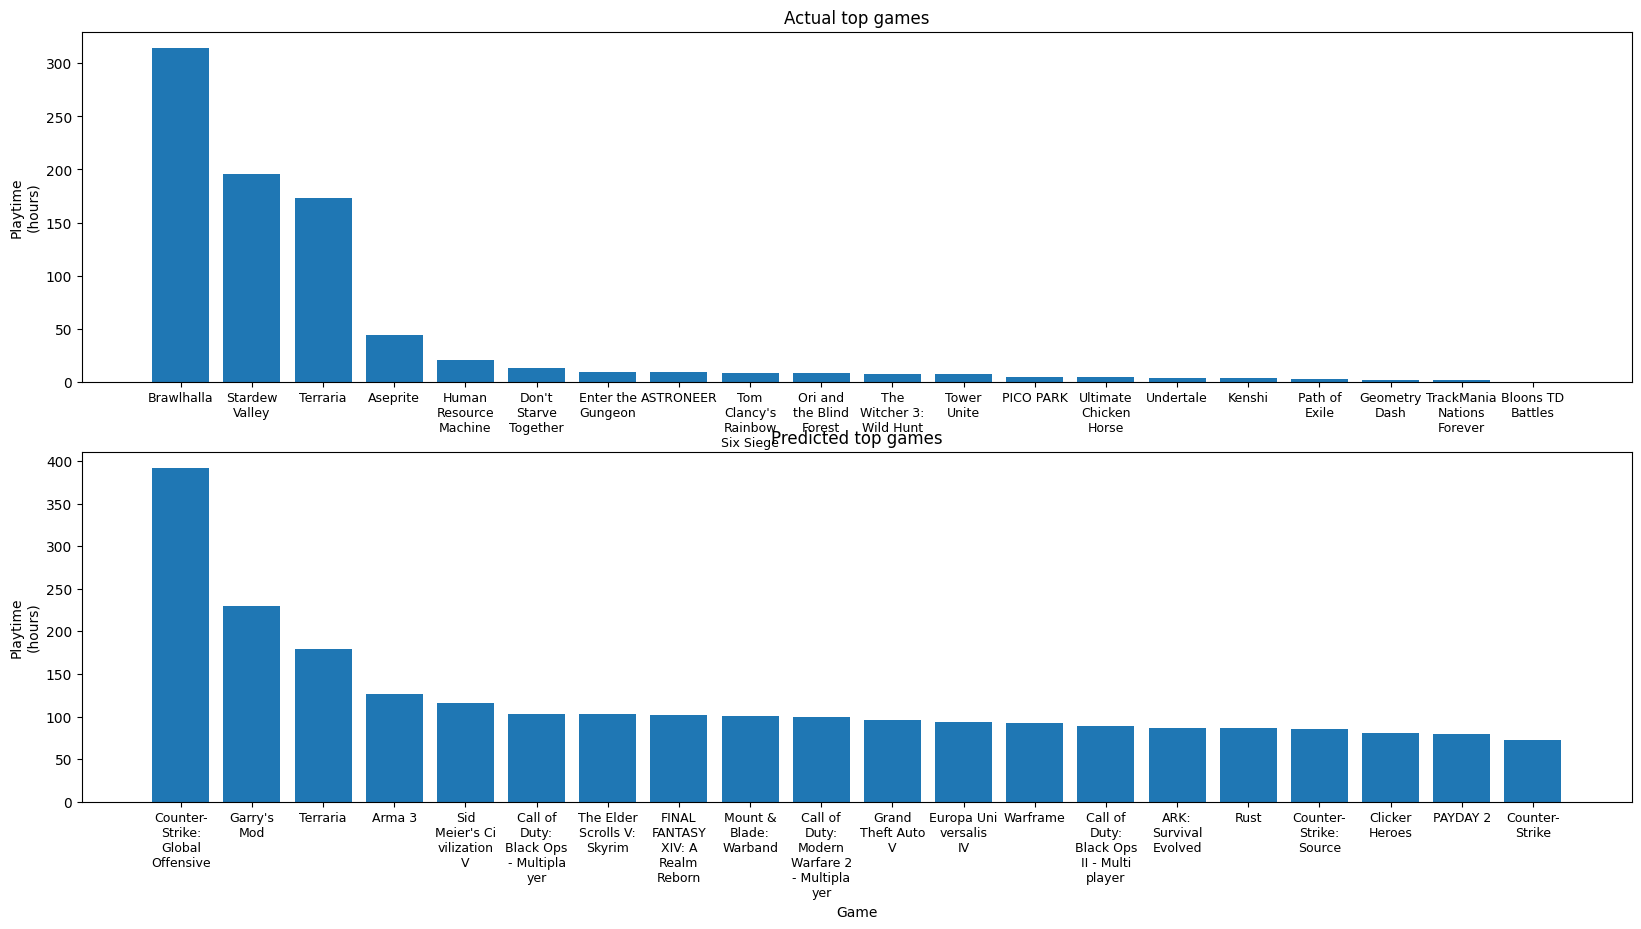

In [9]:
theta = predict(I, user_df)
draw_userx_gametimes(user_df, game_df, theta, I, 20)